# Testing all of the Relevant Environments

In this notebook, we're going to set up a simple loop to run through all of the supply chain environments from Orgym and make sure everything runs smoothly. We'll use the ARS algorithm due to its fast training speed and relatively decent cumulative reward.

In [1]:
import gym
import numpy as np
import or_gym

import matplotlib.pyplot as plt

from tqdm import tqdm

# Importing PPO Algorithm and Base Policy
from sb3_contrib import ARS
from sb3_contrib.ars.policies import ARSPolicy
from stable_baselines3.common.evaluation import evaluate_policy

from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import DummyVecEnv, VecMonitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor
import torch as th
import os


In [9]:
def PrimitiveEval(alg, policy, environment, episodes=50000, div=50):
    """ Trains and evaluates agent performance with precision episodes/div

    Args:
        alg (SB3 Algorithm): Imported agent algorithm
        policy (SB3 Policy): Imported policy for the agent
        environment (string): Name of generated environment to train to
        episodes (int): Number of episodes the agent trains for
        div (int): Division Factor for precision of mean_reward array
        
    Returns:
        ep_arr (arr): Array of Timesteps at which evaluation occurs
        mean_rewards (arr): Average total reward over 100 episodes
        mean_error (arr): Average total error over 100 episodes
        
    """
    
    env = or_gym.make(environment)
    
    model = alg(policy, env, verbose=0) # Model Definition
    ep_arr = np.linspace(episodes/div, episodes, div) # Episodes Array (For Plotting)
    mean_reward = np.zeros(div) # Initialising Rewards Array
    mean_error = np.zeros(div) # Initialising Error Array
    
    for i in range(div):
        model.learn(total_timesteps=episodes/div, progress_bar=True)
        mean_reward[i], mean_error[i] = evaluate_policy(model, env, n_eval_episodes=100)
    
    return ep_arr, mean_reward, mean_error

Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Output()

/Users/nathan/miniforge3/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


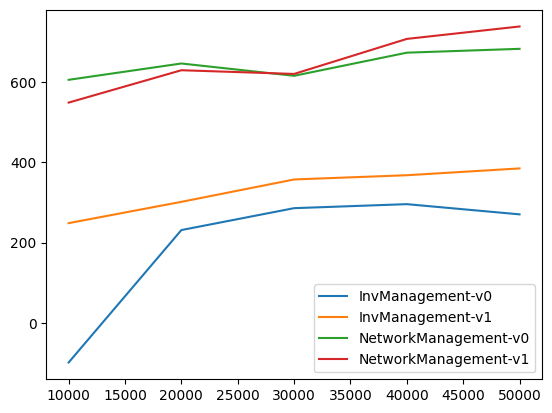

In [11]:
plt.figure()

environments = ['InvManagement-v0', 'InvManagement-v1', 'NetworkManagement-v0', 'NetworkManagement-v1']

for i in environments:
    a, b, c = PrimitiveEval(ARS, ARSPolicy, i, episodes=50000, div=5)
    plt.plot(a,b, label=i)
    
plt.legend()
plt.show()